Q1. Simulate a single path of a one-dimensional Wiener process (standard Brownian motion) over the interval [0, T]. Your output should be the full simulated path.

## 🧠 Problem Analysis

We aim to simulate a single path of a **1D Wiener process** (standard Brownian motion) over the interval \([0, T]\), with the following properties:

- **Initial Condition:**  
  $$
  W(0) = 0
  $$

- **Independent Increments:**  
  $$
  W(t) - W(s) \sim \mathcal{N}(0, t - s), \quad \text{for } 0 \leq s < t
  $$

- **Continuous Path:**  
  Simulated via discrete approximation.

---

## 🛠️ Method

- **Discretize** the interval \([0, T]\) into \(N\) equal steps:  
  $$
  \Delta t = \frac{T}{N}
  $$

- **Generate increments** \(\Delta W_i\) from a normal distribution:  
  $$
  \Delta W_i \sim \mathcal{N}(0, \Delta t)
  $$

- **Construct the path** using a cumulative sum:  
  $$
  W(t_{i}) = \sum_{j=1}^{i} \Delta W_j, \quad \text{with } W(0) = 0
  $$

This provides a discrete approximation to the continuous Wiener process.


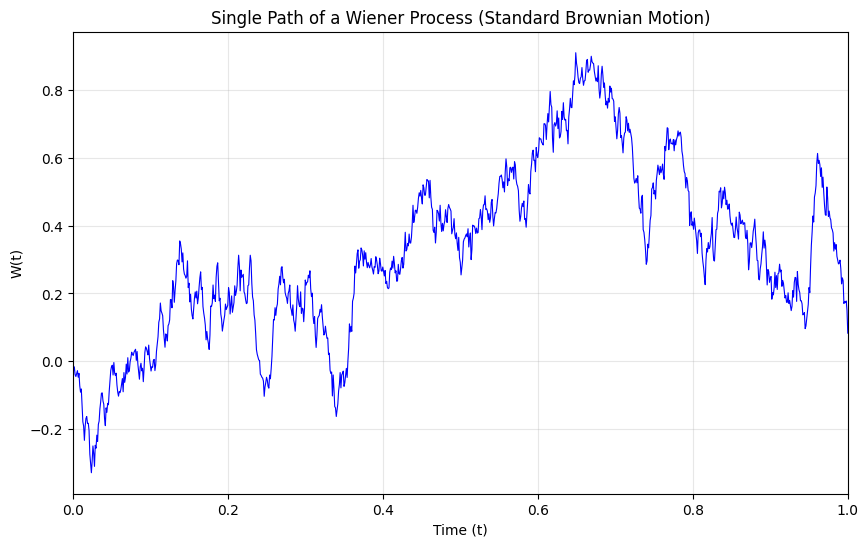

Time steps: [0.    0.001 0.002 0.003 0.004]...
Wiener values: [ 0.         -0.02702393 -0.0165552  -0.03968318 -0.04511998]...


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0       # Total time (e.g., 1 year)
N = 1000      # Number of time steps
dt = T / N    # Time increment size

# Initialize arrays
time = np.linspace(0, T, N+1)  # Time grid: [0, dt, 2dt, ..., T]
W = np.zeros(N+1)               # Wiener process array (starts at 0)

# Generate Brownian increments: dW ~ N(0, dt)
dW = np.random.normal(0, np.sqrt(dt), N)  # N independent increments

# Construct path: cumulative sum of increments
for i in range(1, N+1):
    W[i] = W[i-1] + dW[i-1]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, W, 'b-', linewidth=0.8)
plt.title('Single Path of a Wiener Process (Standard Brownian Motion)')
plt.xlabel('Time (t)')
plt.ylabel('W(t)')
plt.grid(True, alpha=0.3)
plt.xlim(0, T)
plt.show()

# Output path values (optional)
print(f"Time steps: {time[:5]}...")
print(f"Wiener values: {W[:5]}...")

## 🧠 Explanation

### Time Discretization

`np.linspace(0, T, N+1)` creates \( N + 1 \) time points from 0 to \( T \).  
Example: For \( T = 1 \), \( N = 4 \) →  
`times = [0, 0.25, 0.5, 0.75, 1.0]`

---

### Brownian Increments

Each increment \( \Delta W \sim \mathcal{N}(0, \Delta t) \)  
Use:

```python
np.random.normal(0, np.sqrt(dt), N)


Q2

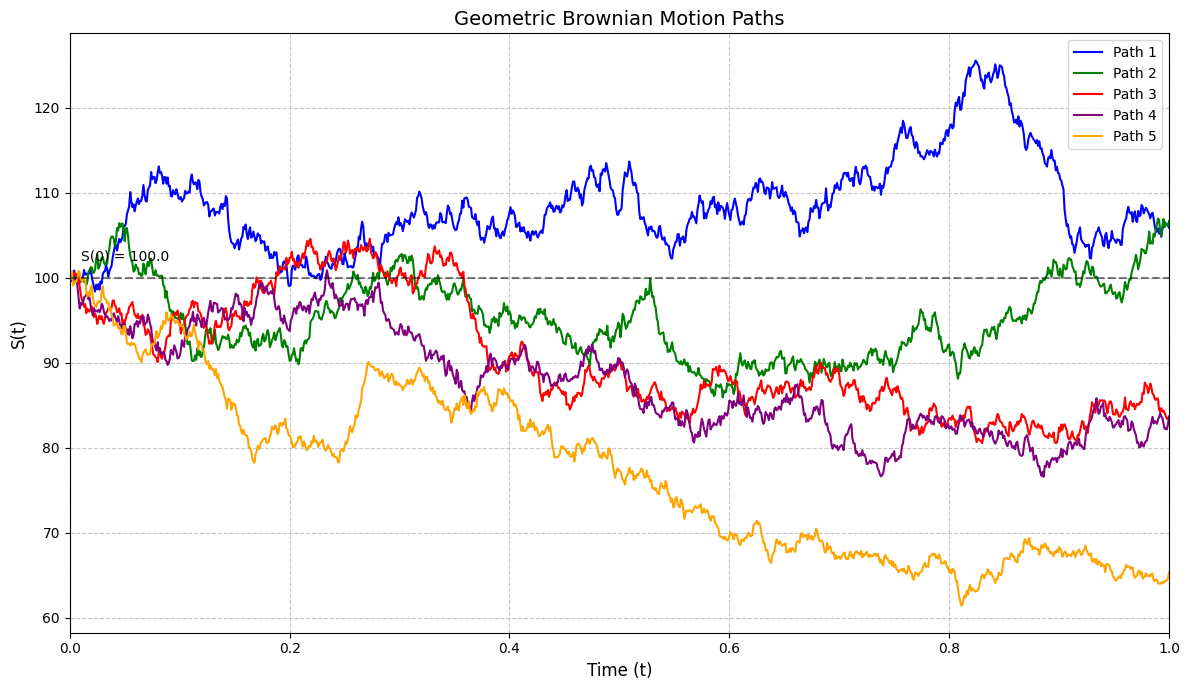

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0          # Total time (e.g., 1 year)
N = 1000         # Number of time steps
dt = T / N       # Time increment size
S0 = 100.0       # Initial stock price
alpha = 0.08     # Drift coefficient (e.g., 8% annual return)
sigma = 0.2      # Volatility coefficient (e.g., 20% annual volatility)
n_paths = 5      # Number of paths to simulate

# Create time grid: [0, dt, 2dt, ..., T]
time = np.linspace(0, T, N+1)

# Initialize array to store all paths: shape = (n_paths, N+1)
S_paths = np.zeros((n_paths, N+1))
S_paths[:, 0] = S0  # All paths start at S0

# Simulate each path
for path in range(n_paths):
    # Generate Wiener process path (as in Q1)
    dW = np.random.normal(0, np.sqrt(dt), N)  # Brownian increments
    W = np.zeros(N+1)                         # Initialize Wiener process
    for i in range(1, N+1):
        W[i] = W[i-1] + dW[i-1]              # Cumulative sum of increments

    # Compute GBM using vectorized operations
    drift_term = (alpha - 0.5 * sigma**2) * time
    diffusion_term = sigma * W
    S_paths[path] = S0 * np.exp(drift_term + diffusion_term)

# Plot results
plt.figure(figsize=(12, 7))
colors = ['blue', 'green', 'red', 'purple', 'orange']

for path in range(n_paths):
    plt.plot(time, S_paths[path],
             color=colors[path % len(colors)],
             linewidth=1.5,
             label=f'Path {path+1}')

plt.title('Geometric Brownian Motion Paths', fontsize=14)
plt.xlabel('Time (t)', fontsize=12)
plt.ylabel('S(t)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xlim(0, T)

# Highlight initial value
plt.axhline(y=S0, color='black', linestyle='--', alpha=0.5)
plt.text(0.01, S0*1.02, f'S(0) = {S0}', fontsize=10)

plt.tight_layout()
plt.show()

$$
\begin{aligned}
\mathbb{E}[W_s W_t] &= \mathbb{E}[W_s (W_s + (W_t - W_s))] \\
&= \mathbb{E}[W_s^2] + \mathbb{E}[W_s (W_t - W_s)] \\
&= \mathrm{Var}(W_s) + \mathbb{E}[W_s]\mathbb{E}[W_t - W_s] \quad \text{(by independence)} \\
&= s + 0 \cdot 0 = s.
\end{aligned}
$$


Q3

## ✅ Q3: Proving \( \mathbb{E}[W_s W_t] = \min(s, t) \)

---

### 🧠 Theoretical Proof

Let \( \{W_t\}_{t \geq 0} \) be a standard Brownian motion. We want to prove:

$$
\mathbb{E}[W_s W_t] = \min(s, t), \quad \text{for all } s, t \geq 0
$$

---

### 🔑 Brownian Motion Properties

- \( W_0 = 0 \)
- Independent increments
- \( W_t - W_s \sim \mathcal{N}(0, t - s) \)
- \( \mathbb{E}[W_t] = 0 \), \( \text{Var}(W_t) = t \)

---

### 🔍 Case 1: \( s \leq t \)

We write:

$$
W_t = W_s + (W_t - W_s)
$$

Then:

$$
\mathbb{E}[W_s W_t] = \mathbb{E}[W_s(W_s + (W_t - W_s))] = \mathbb{E}[W_s^2] + \mathbb{E}[W_s(W_t - W_s)]
$$

- \( \mathbb{E}[W_s^2] = \text{Var}(W_s) = s \)
- Since \( W_s \) and \( W_t - W_s \) are independent:

$$
\mathbb{E}[W_s(W_t - W_s)] = \mathbb{E}[W_s] \cdot \mathbb{E}[W_t - W_s] = 0
$$

So:

$$
\mathbb{E}[W_s W_t] = s = \min(s, t)
$$

---

### 🔄 Case 2: \( t < s \)

By symmetry:

$$
\mathbb{E}[W_s W_t] = \mathbb{E}[W_t W_s] = \min(t, s)
$$

---

### ✅ Final Result:

$$
\boxed{ \mathbb{E}[W_s W_t] = \min(s, t) }
$$

---



In [ ]:
import numpy as np

# Parameters
s = 0.4
t = 0.7
num_simulations = 1_000_000  # High precision

# Generate samples based on case
if s <= t:
    W_s = np.random.normal(0, np.sqrt(s), num_simulations)
    delta_W = np.random.normal(0, np.sqrt(t - s), num_simulations)
    W_t = W_s + delta_W
else:
    W_t = np.random.normal(0, np.sqrt(t), num_simulations)
    delta_W = np.random.normal(0, np.sqrt(s - t), num_simulations)
    W_s = W_t + delta_W

# Compute E[W_s W_t]
products = W_s * W_t
empirical_expectation = np.mean(products)
theoretical_value = min(s, t)

print(f"Simulated E[W_s W_t] = {empirical_expectation:.6f}")
print(f"Theoretical min(s, t) = {theoretical_value:.6f}")
print(f"Absolute Error = {abs(empirical_expectation - theoretical_value):.6f}")

Simulated E[W_s W_t] = 0.400453
Theoretical min(s, t) = 0.400000
Absolute Error = 0.000453


Q4

### Q4: Properties of Brownian Motion Increments

---

#### Part 1: Distribution of \( W_t - W_s \) for \( 0 \leq s < t \)

**Theoretical Proof**

Let \( \{W_u\}_{u \geq 0} \) be standard Brownian motion. We aim to show:

$$
W_t - W_s \sim \mathcal{N}(0, t - s)
$$

**1. Gaussian Process Property:**

Brownian motion is a *Gaussian process*, meaning any finite collection
\( W_{u_1}, W_{u_2}, \dots, W_{u_k} \) follows a multivariate normal distribution.

**2. Linear Combination:**

The increment can be written as:

$$
W_t - W_s = (W_t - W_0) - (W_s - W_0)
$$

Since \( W_0 = 0 \), we have:

$$
W_t - W_s = W_t - W_s
$$

Thus, it is a linear combination of Gaussian random variables, and hence itself Gaussian.

**3. Mean and Variance:**

- **Mean:**

$$
\mathbb{E}[W_t - W_s] = \mathbb{E}[W_t] - \mathbb{E}[W_s] = 0 - 0 = 0
$$

- **Variance:**

\[
\begin{aligned}
\mathrm{Var}(W_t - W_s) &= \mathbb{E}[(W_t - W_s)^2] \\
&= \mathbb{E}[W_t^2] - 2\mathbb{E}[W_t W_s] + \mathbb{E}[W_s^2]
\end{aligned}
\]

Using \( \mathbb{E}[W_u^2] = u \) and \( \mathbb{E}[W_s W_t] = \min(s,t) = s \):

$$
\mathrm{Var}(W_t - W_s) = t - 2s + s = t - s
$$

**Conclusion:**

$$
W_t - W_s \sim \mathcal{N}(0, t - s)
$$

---

#### Part 2: Independence of Non-overlapping Increments

**Theoretical Proof**

Let intervals \( [s_1, t_1] \) and \( [s_2, t_2] \) satisfy \( t_1 \leq s_2 \). We want to show:

$$
(W_{t_1} - W_{s_1}) \perp (W_{t_2} - W_{s_2})
$$

**1. Independent Increments Property:**

Standard Brownian motion has *independent increments*: for any
\( 0 \leq a < b \leq c < d \), the increments
\( (W_b - W_a) \) and \( (W_d - W_c) \) are independent.

**2. Application:**

Let:

- \( a = s_1, \quad b = t_1 \)
- \( c = s_2, \quad d = t_2 \)
$
Since \( t_1 \leq s_2 \), we have \( a < b \leq c < d \), so:
$
$$
(W_{t_1} - W_{s_1}) \perp (W_{t_2} - W_{s_2})
$$




W_t - W_s (s=0.3, t=0.8):
  Simulated Mean: -0.000444 | Theoretical: 0.0
  Simulated Variance: 0.497168 | Theoretical: 0.500000


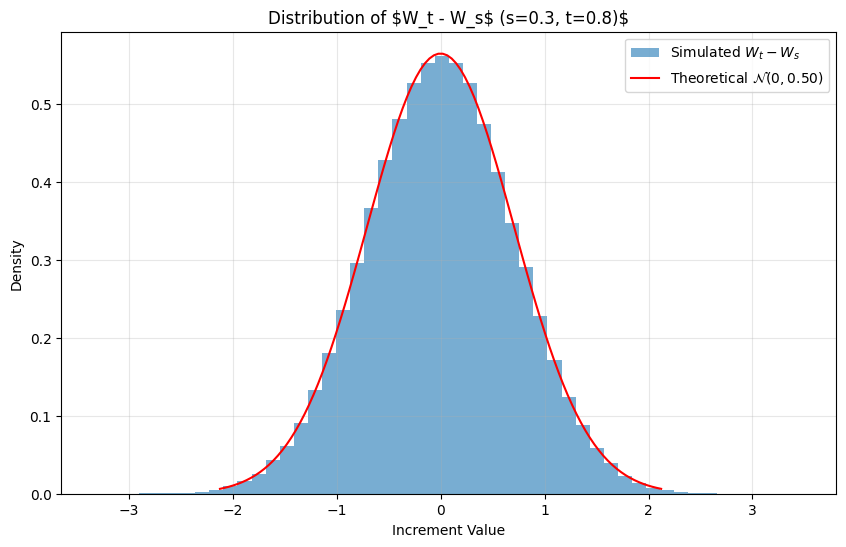


Non-overlapping increments:
  Interval 1: [0.1, 0.4] | Interval 2: [0.5, 0.9]
  Correlation: 0.003675 (Expected: ≈0)


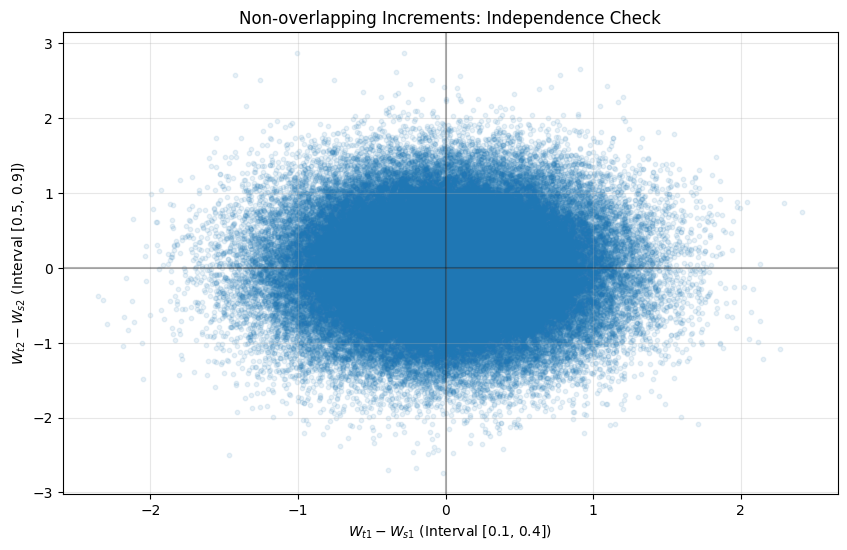

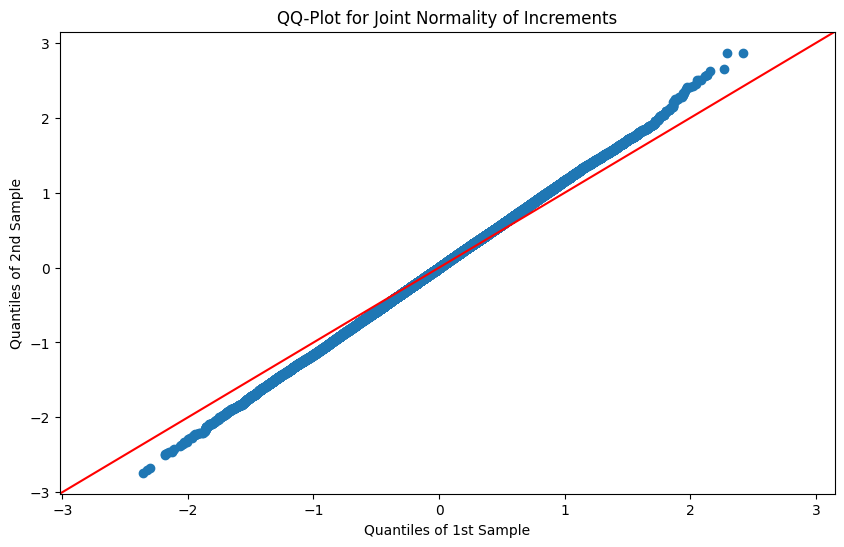

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, pearsonr

# Parameters
s = 0.3
t = 0.8
s1, t1 = 0.1, 0.4  # First interval [0.1, 0.4]
s2, t2 = 0.5, 0.9  # Second interval [0.5, 0.9] (non-overlapping)
num_simulations = 100000

# Initialize arrays
increments_st = np.zeros(num_simulations)  # W_t - W_s
increments_1 = np.zeros(num_simulations)    # W_{t1} - W_{s1}
increments_2 = np.zeros(num_simulations)    # W_{t2} - W_{s2}

for i in range(num_simulations):
    # Generate Brownian path up to max(t, t2)
    max_time = max(t, t2)
    steps = 1000
    dt = max_time / steps
    dW = np.random.normal(0, np.sqrt(dt), steps)
    W = np.cumsum(dW)
    W = np.insert(W, 0, 0)  # Add W(0)=0

    # Get indices for time points
    def time_to_idx(u):
        return min(int(u / max_time * steps), steps)

    # Compute increments for W_t - W_s
    idx_s = time_to_idx(s)
    idx_t = time_to_idx(t)
    increments_st[i] = W[idx_t] - W[idx_s]

    # Compute increments for non-overlapping intervals
    idx_s1 = time_to_idx(s1)
    idx_t1 = time_to_idx(t1)
    increments_1[i] = W[idx_t1] - W[idx_s1]

    idx_s2 = time_to_idx(s2)
    idx_t2 = time_to_idx(t2)
    increments_2[i] = W[idx_t2] - W[idx_s2]

# ==========================================================================
# Part 1: Verify distribution of W_t - W_s ~ N(0, t-s)
# ==========================================================================
mean_st = np.mean(increments_st)
var_st = np.var(increments_st)
print(f"W_t - W_s (s={s}, t={t}):")
print(f"  Simulated Mean: {mean_st:.6f} | Theoretical: 0.0")
print(f"  Simulated Variance: {var_st:.6f} | Theoretical: {t-s:.6f}")

# Plot histogram vs theoretical PDF
plt.figure(figsize=(10, 6))
plt.hist(increments_st, bins=50, density=True, alpha=0.6,
         label=f"Simulated $W_t - W_s$")

# Theoretical normal distribution
x = np.linspace(-3*np.sqrt(t-s), 3*np.sqrt(t-s), 100)
plt.plot(x, norm.pdf(x, 0, np.sqrt(t-s)), 'r-',
         label=f"Theoretical $\mathcal{{N}}(0, {t-s:.2f})$")

plt.title(f"Distribution of $W_t - W_s$ (s={s}, t={t})$")
plt.xlabel("Increment Value")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ==========================================================================
# Part 2: Verify independence of non-overlapping increments
# ==========================================================================
# Calculate correlation
correlation, p_value = pearsonr(increments_1, increments_2)
print("\nNon-overlapping increments:")
print(f"  Interval 1: [{s1}, {t1}] | Interval 2: [{s2}, {t2}]")
print(f"  Correlation: {correlation:.6f} (Expected: ≈0)")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(increments_1, increments_2, alpha=0.1, s=10)
plt.title("Non-overlapping Increments: Independence Check")
plt.xlabel(f"$W_{{t1}} - W_{{s1}}$ (Interval [{s1}, {t1}])")
plt.ylabel(f"$W_{{t2}} - W_{{s2}}$ (Interval [{s2}, {t2}])")
plt.grid(alpha=0.3)
plt.axhline(0, color='black', linestyle='-', alpha=0.3)
plt.axvline(0, color='black', linestyle='-', alpha=0.3)
plt.show()

# QQ-plot for joint normality (visual check)
from statsmodels.graphics.gofplots import qqplot_2samples
fig, ax = plt.subplots(figsize=(10, 6))
qqplot_2samples(increments_1, increments_2, line='45', ax=ax)
plt.title("QQ-Plot for Joint Normality of Increments")
plt.show()

Q5)

### Theoretical Proof

---

#### Part 1: Prove \( \mathbb{E}[W_t \mid \mathcal{F}_s] = W_s \) for \( 0 \leq s \leq t \)

**Decomposition of \( W_t \):**

$$
W_t = W_s + (W_t - W_s)
$$

**Conditional Expectation:**

\[
\mathbb{E}[W_t \mid \mathcal{F}_s]
= \mathbb{E}[W_s + (W_t - W_s) \mid \mathcal{F}_s]
\]

**Linearity of Conditional Expectation:**

\[
= \mathbb{E}[W_s \mid \mathcal{F}_s] + \mathbb{E}[W_t - W_s \mid \mathcal{F}_s]
\]

**\( \mathcal{F}_s \)-measurability:**

Since \( W_s \) is \( \mathcal{F}_s \)-measurable:

$$
\mathbb{E}[W_s \mid \mathcal{F}_s] = W_s
$$

**Independent Increments Property:**

The increment \( W_t - W_s \) is independent of \( \mathcal{F}_s \) (by Brownian motion definition), so:

$$
\mathbb{E}[W_t - W_s \mid \mathcal{F}_s] = \mathbb{E}[W_t - W_s]
$$

**Expectation of Increment:**

From previous result:

$$
W_t - W_s \sim \mathcal{N}(0, t - s) \Rightarrow \mathbb{E}[W_t - W_s] = 0
$$

**Final Result:**

\[
\mathbb{E}[W_t \mid \mathcal{F}_s] = W_s + 0 = W_s
\]

---

#### Part 2: Conclude Brownian Motion is a Martingale

A stochastic process \( \{X_t\} \) is a **martingale** with respect to filtration \( \{\mathcal{F}_t\} \) if:

1. **Integrability**: \( \mathbb{E}[|X_t|] < \infty \) for all \( t \)  
2. **Adaptedness**: \( X_t \) is \( \mathcal{F}_t \)-measurable for all \( t \)  
3. **Martingale Property**: \( \mathbb{E}[X_t \mid \mathcal{F}_s] = X_s \) for all \( s \leq t \)

---

For Brownian motion \( \{W_t\} \):

- **Integrability**:

\[
\mathbb{E}[|W_t|] \leq \sqrt{\mathbb{E}[W_t^2]} = \sqrt{t} < \infty
\]

(by Jensen’s inequality)

- **Adaptedness**:

By definition, \( W_t \) is adapted to the natural filtration:

$$
\mathcal{F}_t = \sigma(W_u : 0 \leq u \leq t)
$$

- **Martingale Property**:

Already proven above:

$$
\mathbb{E}[W_t \mid \mathcal{F}_s] = W_s
$$

---

**✅ Conclusion: Brownian motion is a martingale.**


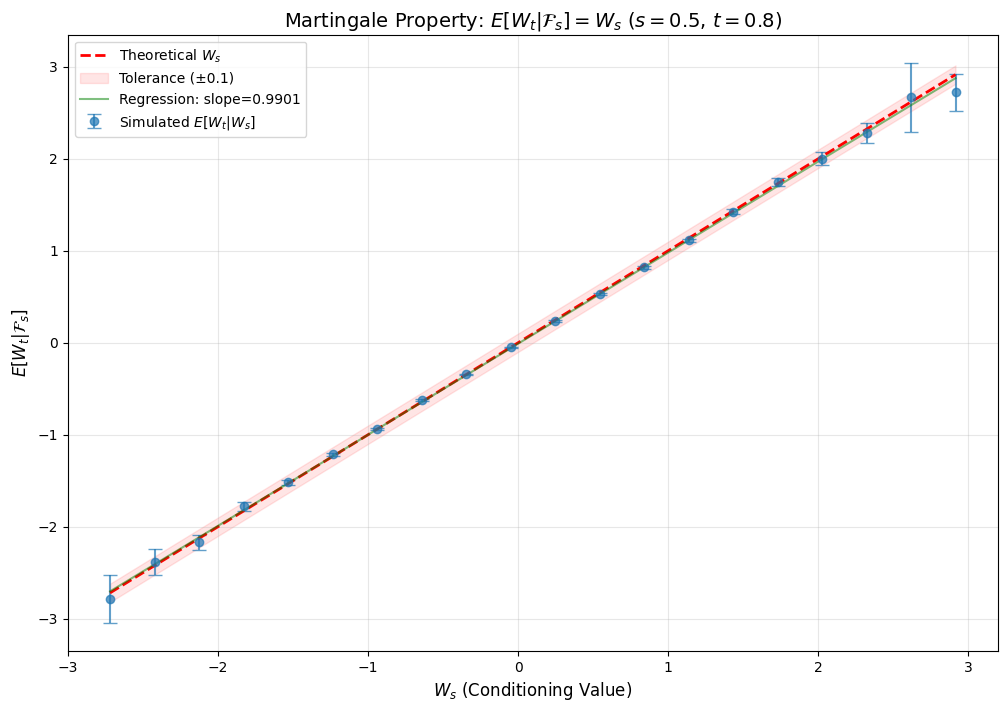

Mean absolute deviation: 0.033188
Regression slope: 0.990145 (Expected: 1.0)
Regression intercept: -0.010259 (Expected: 0.0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
s = 0.5  # Fixed time s (conditioning time)
t = 0.8  # Future time t (t > s)
T = max(s, t)  # Total simulation time
num_paths = 100000  # Number of paths
steps = 1000  # Time steps

# Arrays to store W_s and W_t
W_s_vals = np.zeros(num_paths)
W_t_vals = np.zeros(num_paths)

# Simulate Brownian paths
np.random.seed(42)
for i in range(num_paths):
    # Generate increments
    dW = np.random.normal(0, np.sqrt(T/steps), steps)
    W = np.cumsum(dW)
    W = np.insert(W, 0, 0)  # Add W(0)=0

    # Find indices for s and t
    idx_s = int(s / T * steps)
    idx_t = int(t / T * steps)

    W_s_vals[i] = W[idx_s]
    W_t_vals[i] = W[idx_t]

# Bin W_s values to estimate conditional expectation
num_bins = 20
bin_edges = np.linspace(np.min(W_s_vals), np.max(W_s_vals), num_bins+1)
bin_indices = np.digitize(W_s_vals, bin_edges)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_means = np.zeros(num_bins)
bin_stds = np.zeros(num_bins)

# Compute E[W_t | W_s] for each bin
for bin_idx in range(1, num_bins+1):
    mask = (bin_indices == bin_idx)
    if np.any(mask):
        bin_means[bin_idx-1] = np.mean(W_t_vals[mask])
        bin_stds[bin_idx-1] = np.std(W_t_vals[mask]) / np.sqrt(np.sum(mask))

# Filter out empty bins
valid_bins = ~np.isnan(bin_means)
bin_centers = bin_centers[valid_bins]
bin_means = bin_means[valid_bins]
bin_stds = bin_stds[valid_bins]

# Plot results
plt.figure(figsize=(12, 8))
plt.errorbar(bin_centers, bin_means, yerr=2*bin_stds, fmt='o',
             capsize=5, alpha=0.7, label='Simulated $E[W_t|W_s]$')
plt.plot(bin_centers, bin_centers, 'r--', linewidth=2,
         label='Theoretical $W_s$')
plt.fill_between(bin_centers, bin_centers - 0.1, bin_centers + 0.1,
                 color='red', alpha=0.1, label='Tolerance (±0.1)')

plt.title(f'Martingale Property: $E[W_t | \mathcal{{F}}_s] = W_s$ ($s={s}$, $t={t}$)', fontsize=14)
plt.xlabel('$W_s$ (Conditioning Value)', fontsize=12)
plt.ylabel('$E[W_t | \mathcal{F}_s]$', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Add regression line to quantify relationship
slope, intercept = np.polyfit(bin_centers, bin_means, 1)
reg_line = slope * bin_centers + intercept
plt.plot(bin_centers, reg_line, 'g-', alpha=0.5,
         label=f'Regression: slope={slope:.4f}')

plt.legend()
plt.show()

# Quantify accuracy
deviation = np.mean(np.abs(bin_means - bin_centers))
print(f"Mean absolute deviation: {deviation:.6f}")
print(f"Regression slope: {slope:.6f} (Expected: 1.0)")
print(f"Regression intercept: {intercept:.6f} (Expected: 0.0)")